In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import numpy as np
import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
bag_df = pd.read_csv('bag_words.csv', sep=';')

In [3]:
bag_df.columns = ['link', 'categoria', 'texto']

In [4]:
bag_df.head()

,link,categoria,texto
0,http://g1.globo.com/economia/agronegocios/agro...,agro,criação peixes cativeiro brasil expansão país ...
1,http://g1.globo.com/economia/agronegocios/noti...,agro,acordo ibge abate somou milhões cabeças maior ...
2,http://g1.globo.com/sp/piracicaba-regiao/notic...,agro,universidade paulo usp piracicabasp anunciou i...
3,http://g1.globo.com/economia/midia-e-marketing...,agro,mcdonalds saladas compostas vegetais orgânicos...
4,http://g1.globo.com/economia/agronegocios/noti...,agro,anúncio feito presidente instituto agronômico ...


In [5]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
link         706 non-null object
categoria    706 non-null object
texto        695 non-null object
dtypes: object(3)
memory usage: 16.6+ KB


In [6]:
bag_df.describe()

,link,categoria,texto
count,706,706,695
unique,696,6,685
top,http://g1.globo.com/educacao/noticia/ninguem-s...,ciencia-e-saude,acidente teori zavascki veja sabe agora é boat...
freq,2,146,3


In [7]:
bag_df_clean = bag_df.dropna()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    bag_df_clean.texto, bag_df_clean.categoria
)

In [11]:
def do_forest(n_estimators, accuracy):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    forest = RandomForestClassifier(n_estimators=n_estimators) 
    pipe = Pipeline([('vect', vectorizer), ('forest', forest)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [12]:
accuracy = []

for n in range(1,150):
    do_forest(n, accuracy)

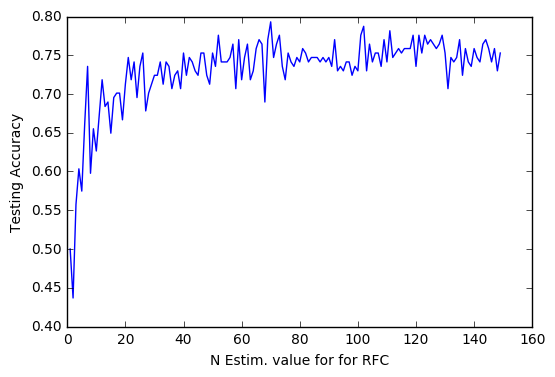

In [14]:
plt.plot(range(1, 150), accuracy)
plt.xlabel('N Estim. value for for RFC')
plt.ylabel('Testing Accuracy')

In [15]:
url = 'http://g1.globo.com/rs/rio-grande-do-sul/noticia/2017/01/nas-proximas-horas-ou-dias-teremos-novo-relator-da-lava-jato-diz-mello.html'
def predict(url):
    from news_categorizer import pre_processor
    words = pre_processor(url)
    resp = pipe.predict([words])
    print resp
    probs = pipe.predict_proba([words])
    resp = zip(pipe.classes_, probs[0])
    resp.sort(key=lambda tup: tup[1], reverse=True)
    print resp
    
#predict(url)

In [16]:
# Running LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(521,) (174,) (521,) (174,)


In [19]:
logreg = LogisticRegression()
vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
pipe = Pipeline([('vect', vect), ('logreg', logreg)])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [20]:
Y_pred = pipe.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

0.844827586207


In [21]:
# Running KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def do_knn(n_neighbors, accuracy):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('knn', knn)])

    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    accuracy.append(acc)

In [23]:
accuracy = []
for n in range(1, 100):
    do_knn(n, accuracy)

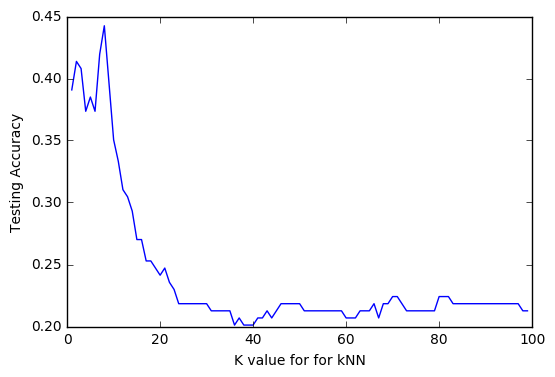

In [24]:
plt.plot(range(1, 100), accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [25]:
# Running Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

def do_nb():
    model = MultinomialNB()
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('nb', model)])

    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    print acc

do_nb()

0.844827586207


In [42]:
# Running SVC

In [51]:
from sklearn.svm import SVC

def do_svc(**kwargs):
    model = SVC(**kwargs)
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('svc', model)])
    
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    print acc

In [52]:
do_svc()

0.252873563218


In [53]:
do_svc(kernel='linear', C=1.0)

0.741379310345


In [57]:
do_svc(kernel='rbf', gamma=0.7, C=1.0)

0.224137931034


In [58]:
do_svc(kernel='poly', degree=3, C=1.0)

0.229885057471


In [59]:
do_svc(C=1.0)

0.252873563218
